<a href="https://colab.research.google.com/github/faraztrazaky/MachineLearningTasks/blob/main/Minggu%20ke-3/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install kaggle

In [75]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"andizaky","key":"3761d01c2ea4d4796edef232951c55ec"}'}

In [76]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [77]:
!kaggle datasets download -d mahmoudelhemaly/students-grading-dataset

Dataset URL: https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset
License(s): other
students-grading-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
import zipfile

with zipfile.ZipFile("students-grading-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("students_grading_dataset")

In [79]:
import os
os.listdir("students_grading_dataset")

['metadata.xlsx',
 'Students_Grading_Dataset.json',
 'Students_Grading_Dataset.csv']

In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
df = pd.read_csv("students_grading_dataset/Students_Grading_Dataset.csv")
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [82]:
print("\nInformasi Data:")
df.info()


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score  

In [83]:
print("\nJumlah missing values di setiap kolom:")
print(df.isnull().sum())


Jumlah missing values di setiap kolom:
Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64


In [84]:
# Numerik -> median
numeric_cols_with_missing = ['Attendance (%)', 'Assignments_Avg']
for col in numeric_cols_with_missing:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Kategorikal -> Unknown
df['Parent_Education_Level'].fillna('Unknown', inplace=True)

print("\nMissing values setelah ditangani:")
print(df.isnull().sum())


Missing values setelah ditangani:
Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [87]:
display(df_scaled.head())

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,-1.731704,1.105042,1.482649,-1.731704,-1.020612,0.478290,0.784143,-1.702624,-0.888758,-0.685779,...,0.761001,-1.321791,1.547540,-1.575071,-0.656837,0.338862,-0.932748,1.079497,-0.168038,-1.231384
1,-1.731012,0.670157,-1.468014,-0.961981,0.979804,-1.532177,0.784143,1.602442,1.563093,-1.383115,...,-1.336493,-1.700302,-1.169588,0.184346,-0.656837,0.338862,1.068285,1.079497,-0.517534,1.729766
2,-1.730319,-1.504266,0.302384,-0.192258,0.979804,1.483524,-1.436597,-1.342579,-0.190387,1.394627,...,-0.078690,-0.334882,0.868258,0.418018,-0.656837,0.338862,-0.265737,-0.246341,0.181458,-0.198425
3,-1.729626,1.105042,1.482649,0.577466,-1.020612,1.483524,1.894513,1.446667,-1.309407,0.637535,...,1.192288,-0.937028,-1.169588,0.981582,1.522449,0.338862,-0.932748,-1.572178,-0.867029,0.145895
4,-1.728933,-0.199612,0.892517,1.347189,-1.020612,0.980907,-0.326227,-1.563749,-1.379128,0.536590,...,-0.451038,-0.624496,1.547540,-0.310490,1.522449,0.338862,-0.932748,-1.572178,-1.216525,0.421351


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Set style
sns.set(style="whitegrid")

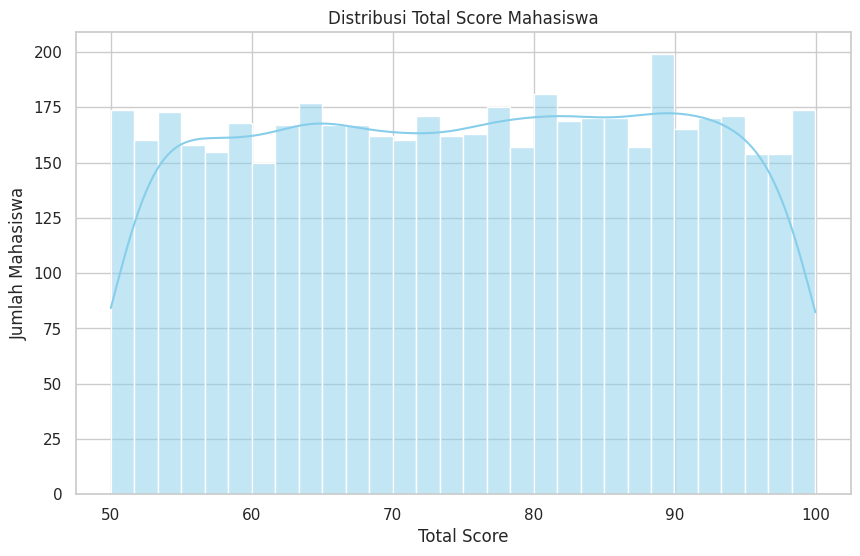

In [90]:
# Visualisasi 1: Distribusi Nilai Total
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Total Score Mahasiswa')
plt.xlabel('Total Score')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

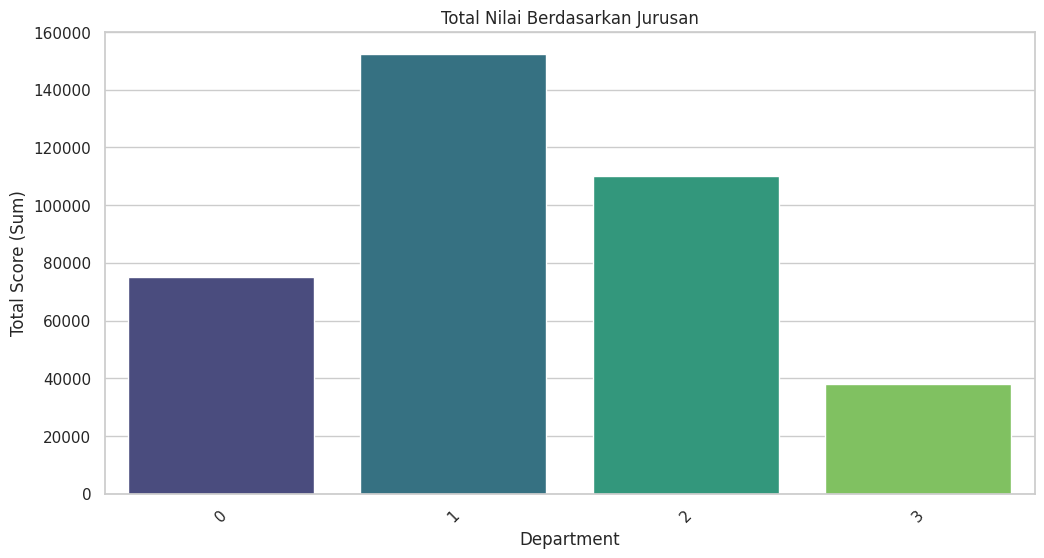

In [91]:
# Visualisasi 2: Rata-rata nilai berdasarkan Jurusan
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='Total_Score', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Nilai Berdasarkan Jurusan')
plt.ylabel('Total Score (Sum)')
plt.xticks(rotation=45)
plt.show()

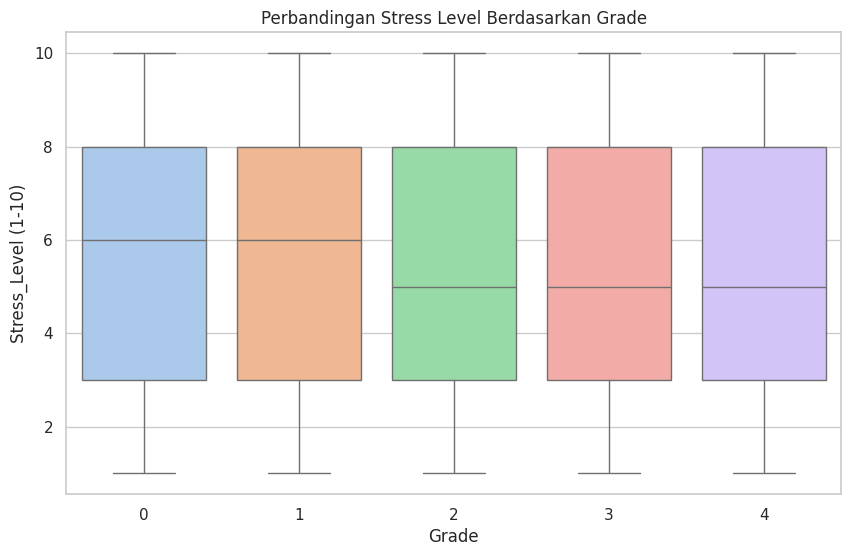

In [92]:
# Visualisasi 3: Boxplot Perbandingan Stress Level berdasarkan Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Stress_Level (1-10)', data=df, palette='pastel')
plt.title('Perbandingan Stress Level Berdasarkan Grade')
plt.show()

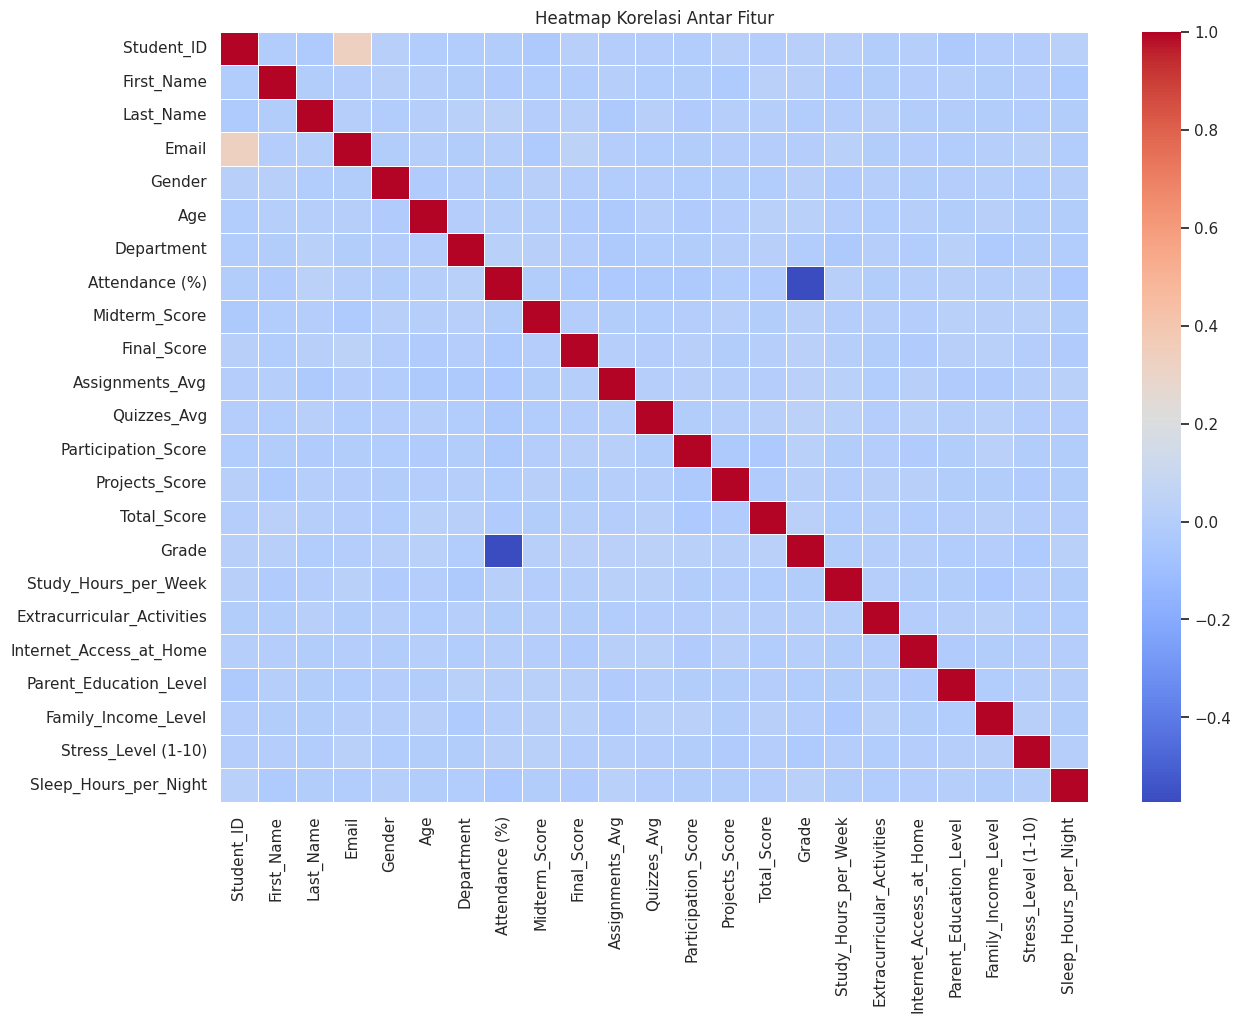

In [93]:
# Visualisasi 4: Korelasi antar fitur numerik
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

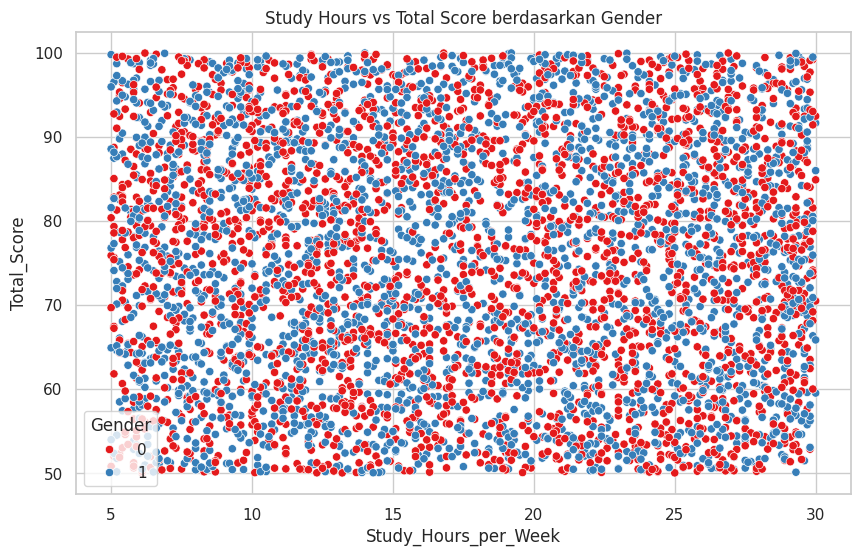

In [94]:
# Visualisasi 5: Scatterplot Study Hours vs Total Score berdasarkan Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_per_Week', y='Total_Score', hue='Gender', data=df, palette='Set1')
plt.title('Study Hours vs Total Score berdasarkan Gender')
plt.show()

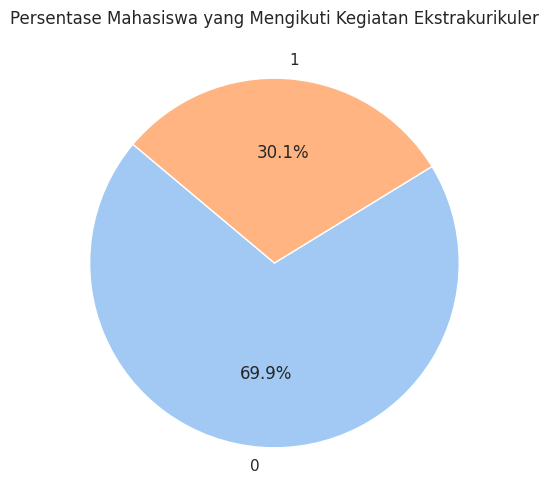

In [95]:
# Visualisasi 6: Pie chart aktivitas ekstrakurikuler
plt.figure(figsize=(6, 6))
activity_counts = df['Extracurricular_Activities'].value_counts()
activity_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Persentase Mahasiswa yang Mengikuti Kegiatan Ekstrakurikuler')
plt.ylabel('')
plt.show()